# Setup

Setting up the environment that pulls from github and importing data

In [0]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

In [2]:
# defining paths to github data
counties_path = 'https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'
states_path = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'

# reading Covid github data into dataframes
#counties_df = pd.read_csv(counties_path, sep=',', header=None, engine='python')
states_df = pd.read_csv(states_path, sep=',', header=0, engine='python')

# display the dataframe(s)
#counties_df
states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


# Preprocessing

Cleaning up and organizing the github data

In [3]:
# create date range of dates for filtering
dateRange = pd.date_range(end=datetime.today(), periods=14).to_pydatetime().tolist()

dateRange

[datetime.datetime(2020, 5, 6, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 7, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 8, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 9, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 10, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 11, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 12, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 13, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 14, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 15, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 16, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 17, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 18, 3, 50, 6, 387862),
 datetime.datetime(2020, 5, 19, 3, 50, 6, 387862)]

In [4]:
# apply date range filter to data
latest_df = pd.DataFrame()
dates_list = []
for i in dateRange:
  date = i.strftime('%Y-%m-%d')
  latest_df = latest_df.append(states_df[states_df['date'] == date])
  dates_list.append(date)

# display data for given date range
latest_df.tail()

,date,state,fips,cases,deaths
4189,2020-05-17,Virginia,51,30388,1009
4190,2020-05-17,Washington,53,19598,1016
4191,2020-05-17,West Virginia,54,1492,67
4192,2020-05-17,Wisconsin,55,12571,453
4193,2020-05-17,Wyoming,56,754,8


In [5]:
# put cases data into appropriate pivot table
cases_output = latest_df.pivot(index='state', columns='date', values='cases')
cases_output = cases_output.iloc[:, ::-1]
cases_output.head()

date,2020-05-17,2020-05-16,2020-05-15,2020-05-14,2020-05-13,2020-05-12,2020-05-11,2020-05-10,2020-05-09,2020-05-08,2020-05-07,2020-05-06
state,,,,,,,,,,,,
Alabama,11771,11674,11373,11101,10700,10464,10164,9889,9668,9385,9046,8691
Alaska,396,392,388,387,383,383,380,378,377,376,373,370
Arizona,13937,13631,13169,12674,12176,11736,11380,11119,10960,10526,9945,9707
Arkansas,4759,4578,4463,4366,4236,4164,4043,4012,3747,3747,3694,3611
California,80366,78933,77015,74947,73218,71150,69514,68051,66824,64616,62481,60787


In [6]:
# put deaths into appropriate pivot table
deaths_output = latest_df.pivot(index='state', columns='date', values='deaths')
deaths_output = deaths_output.iloc[:, ::-1]
deaths_output.head()

date,2020-05-17,2020-05-16,2020-05-15,2020-05-14,2020-05-13,2020-05-12,2020-05-11,2020-05-10,2020-05-09,2020-05-08,2020-05-07,2020-05-06
state,,,,,,,,,,,,
Alabama,488,485,483,473,450,435,403,393,390,383,369,343
Alaska,8,8,8,8,8,8,8,8,8,8,8,8
Arizona,680,679,651,624,594,562,542,536,532,517,450,426
Arkansas,98,98,98,98,97,95,94,91,88,88,88,87
California,3290,3254,3192,3039,3014,2902,2820,2769,2732,2650,2561,2478


# Data Visualization

I'm going to make a chart here

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
state_list = states_df['state'].unique()
state_list.sort()
state_list

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [9]:
dlist = states_df['date'].unique()
dlist.sort()
dlist

array(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-

AttributeError: ignored

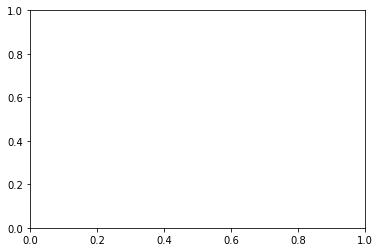

In [10]:
us_results = plt.subplot()

#for state in state_list:
  # filter whole dataset to return all data for an individual state
  #z = states_df[states_df["state"] == state]
z = states_df[states_df["state"] == "Washington"]
state_plot_points = []
day_plot_points = []
  # create function that calculates the net increase in cases day-over-day
for count, day in enumerate(dlist):
  iloc_val = count - 1
  calc1 = z[z["date"] == day]["cases"]
  calc2 = z[z["date"] == dlist.iloc[iloc_val]]["cases"]
  if count == 0:
    y_value = calc1
  else:
    y_value = calc1 - calc2
    # put results into the dict
    #day_plot_points.append(day)
    #state_plot_points.append(y_value)
  us_results.plot(day, y_value)

  # plot results into a line chart for each state
  #us_results.plot(day_plot_points, state_plot_points)


plt.show()

# Connect to Google Sheets

Establish connection with covid Google Sheet

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

# Transform and merge data

Take github data and update data into Google Sheets workbook


In [0]:
# new Covid positive cases data exported to excel sheet
#file_name = datetime.today().strftime('%Y%m%d') + "_covid_positives.xlsx"
file_name = "new_covid_positives.xlsx"
output_path = "./drive/My Drive/Shared_Folder/" + file_name
cases_output.to_excel(output_path)


In [0]:
# new Covid deaths data exported to excel sheet
#file_name2 = datetime.today().strftime('%Y%m%d') + "_covid_deaths.xlsx"
file_name2 = "new_covid_deaths.xlsx"
output_path2 = "./drive/My Drive/Shared_Folder/" + file_name2
deaths_output.to_excel(output_path2)
